In [1]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

df = pd.read_csv("ml-100k\\u.data", sep="\t", names=["user id", "item id", "rating", "timestamp"])

movies_df = pd.read_csv("ml-100k\\u.item", sep="\|", encoding = "ISO-8859-1", header=None)
movies_df = movies_df[[0,1]]
movies_df.columns = ["item id", "movie title"]

df = pd.merge(df, movies_df, on="item id")
df

,user id,item id,rating,timestamp,movie title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)
...,...,...,...,...,...
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [2]:
count_df = df.groupby("movie title").count()
count_df = count_df["user id"]

average_ratings_df = df.groupby("movie title").mean()
average_ratings_df = average_ratings_df["rating"]

new_df = pd.merge(count_df, average_ratings_df, on="movie title")
new_df.columns = ["review count", "average ratings"]
new_df

,review count,average ratings
movie title,,
'Til There Was You (1997),9,2.333333
1-900 (1994),5,2.600000
101 Dalmatians (1996),109,2.908257
12 Angry Men (1957),125,4.344000
187 (1997),41,3.024390
...,...,...
Young Guns II (1990),44,2.772727
"Young Poisoner's Handbook, The (1995)",41,3.341463
Zeus and Roxanne (1997),6,2.166667


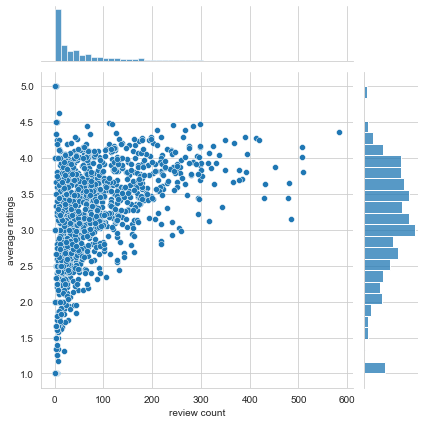

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

sns.jointplot(x="review count", y="average ratings", data=new_df)
plt.show()

In [4]:
movie_matrix = df.pivot_table(index="user id", columns="movie title", values="rating")
movie_matrix

movie title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
def get_recommendations(movie):
    col = movie_matrix[movie]
    corr_series = movie_matrix.corrwith(col)    
    corr_series = corr_series.dropna()
    corr_df = pd.DataFrame(corr_series, columns=["Correlations"]) 
    # because corrwith returns a series, which doesn't has any column name, so we needed to create a dataframe
    corr_df = new_df.join(corr_df)
    review_series = corr_df["review count"] > 100
    corr_df = corr_df[review_series]
    corr_df = corr_df.sort_values("Correlations", ascending=False)
    return corr_df.head()

In [6]:
recommended_df = get_recommendations("Star Wars (1977)") # Enter the title of movie you like to find similar ones
recommended_df

,review count,average ratings,Correlations
movie title,,,
Star Wars (1977),583,4.358491,1.000000
"Empire Strikes Back, The (1980)",367,4.204360,0.747981
Return of the Jedi (1983),507,4.007890,0.672556
Raiders of the Lost Ark (1981),420,4.252381,0.536117
Austin Powers: International Man of Mystery (1997),130,3.246154,0.377433
